# Interpolation

In [3]:
import os
import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interpn

from eval_model import subplot_difficulty_matrix
from model_config import checkpoint_folder, all_players, players
# checkpoint_folder = 'models/04_18/PPO_00_05'
# players = ["500000", "7000000", "5800000"]
# players = [f"{checkpoint_folder}/_{p}_steps" for p in players]
# all_players = [checkpoint_folder + "/" + f[:-4] for f in os.listdir(checkpoint_folder) if f.endswith(".zip")]
# all_players.sort(key=lambda x: int(x.split("_")[-2]))

## Multidimensional interpolation

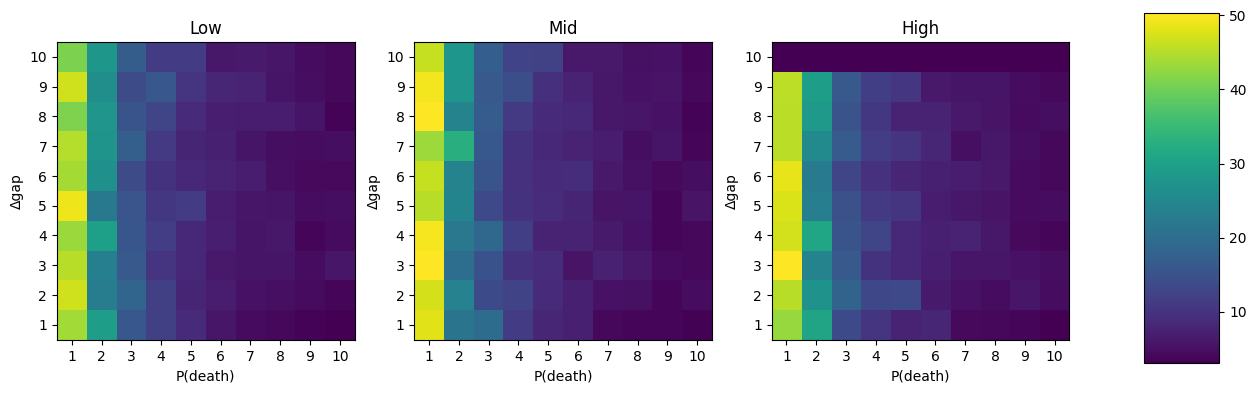

In [4]:
subplot_difficulty_matrix(players, share_cbar=True)

In [5]:
discrete = np.arange(1, 11)

def interpolate(data, res=100):
    smooth = np.linspace(1, 10, res)
    coords = np.array(np.meshgrid(smooth, smooth)).T.reshape(-1, 2)
    z = interpn((discrete, discrete), data, coords, "cubic").reshape(res, -1)
    return z

In [6]:
def subplot_interpolate(
        players, 
        titles=["Low", "Mid", "High"], 
        share_cbar=False):

    fig, axs = plt.subplots(1, len(players), figsize=(15, 5))
    extent = (1, 11, 1, 11)
    extent = [e - 0.5 for e in extent]
    
    values = np.array([interpolate(np.load(f"{p}_means.npy")) for p in players])
    vmin = np.array(values).min()
    vmax = np.array(values).max()

    for i, ax in enumerate(axs):
        data = np.flip(values[i], axis=0)
        if not share_cbar:
            im = ax.matshow(data, extent=extent)
            ax.figure.colorbar(ax.images[0], ax=ax, orientation='vertical')
        else:
            im = ax.matshow(data, extent=extent, vmin=vmin, vmax=vmax)
        ax.set_xlabel("P(death)")
        ax.set_ylabel("\u0394gap")
        ax.xaxis.set_ticks_position('bottom')
        # show all ticks
        ax.set_xticks(range(1, 11))
        ax.set_yticks(range(1, 11))
        ax.set_title(f"{titles[i]}")
    if share_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
    plt.show()


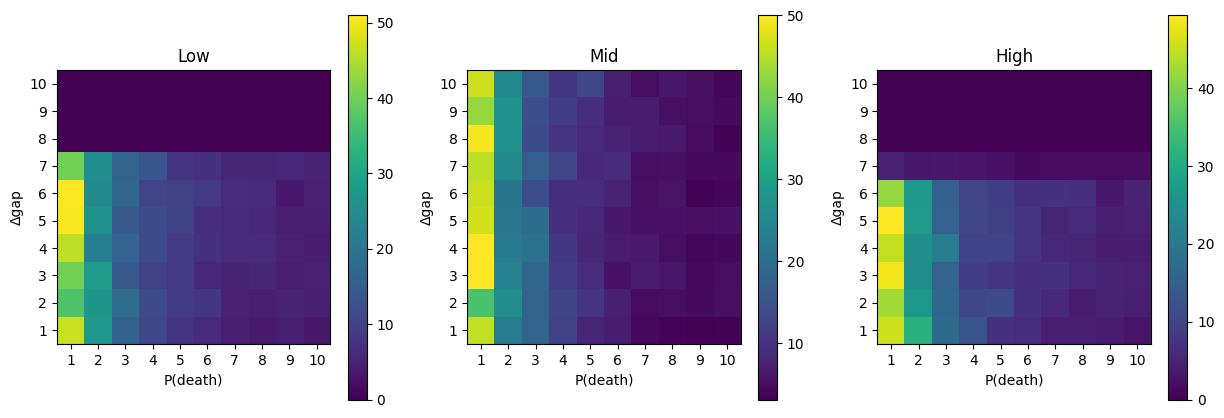

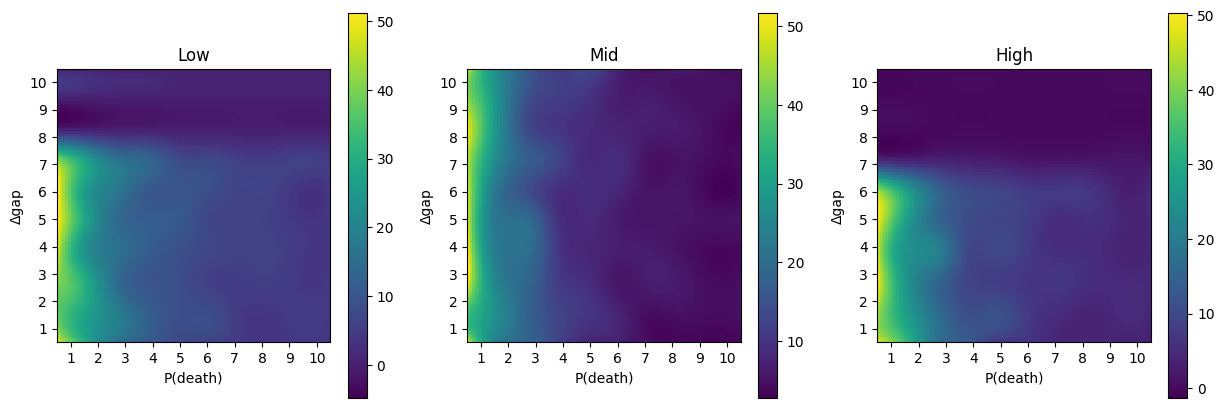

In [7]:
# sample three random players
players = np.random.choice(all_players, 3, replace=False)
subplot_difficulty_matrix(players)
subplot_interpolate(players)

# Difficulty curves
$$
\lambda : \mathbb{R}^+ \mapsto \mathbb{R}^2 \\
d \in [1, 10] \mapsto \begin{bmatrix} P(death) \\ \Delta gap\end{bmatrix} \in [1, 10]^2
$$
We'll be playing with 
$$
\lambda_1(d) = \begin{bmatrix} d \\ 5 \end{bmatrix},\quad
\lambda_2(d) = \begin{bmatrix} 5 \\ d \end{bmatrix}
$$
Where the first travels along the x-axis and the second along the y-axis.

In [8]:
D = np.linspace(1, 10, 100)
X, Y = np.meshgrid(D, D)
data = np.load(f"{players[-1]}_means.npy")
Z = interpolate(data, res=100)

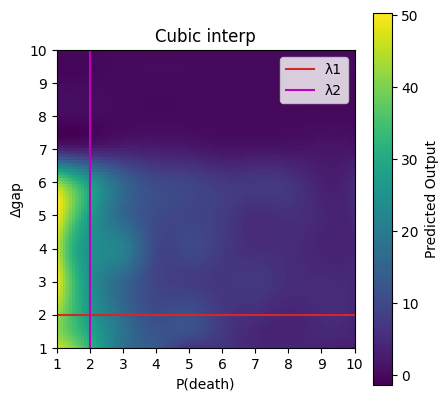

In [9]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 2
c1, c2 = 'tab:red', 'm'
plt.axhline(constant, color=c1, label='\u03BB1')
plt.axvline(constant, color=c2, label='\u03BB2')

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.legend()
plt.title('Cubic interp')
plt.show()

In [10]:
# Have to flip x and y for some reason???
lambda_1 = lambda arr: np.column_stack((np.full_like(arr, constant), arr))
lambda_2 = lambda arr: np.column_stack((arr, np.full_like(arr, constant)))

line_1 = lambda_1(D)
line_2 = lambda_2(D)

y_pred_1 = interpn((discrete, discrete), data, line_1, "cubic")
y_pred_2 = interpn((discrete, discrete), data, line_2, "cubic")

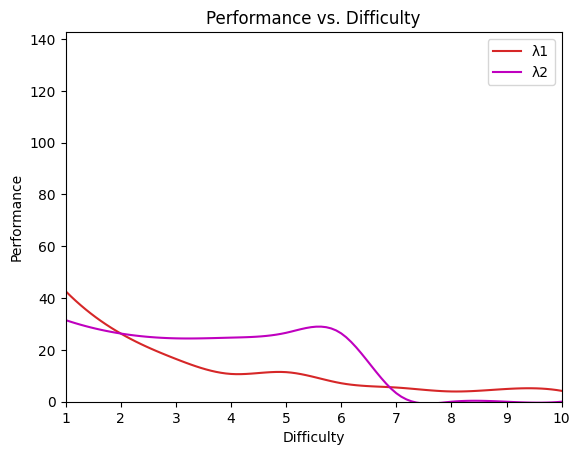

In [11]:
# Plot performance vs. d
plt.plot(D, y_pred_1, label='\u03BB1', color=c1)
plt.plot(D, y_pred_2, label='\u03BB2', color=c2)
plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.ylim(0, max(max(y_pred_1), max(y_pred_2)) + 100)
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

# Do the same for given player but horizontal lines

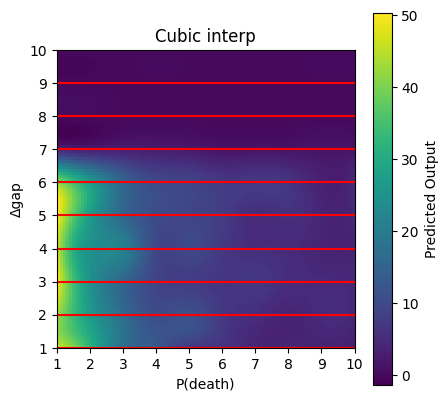

In [12]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 0
[plt.axhline(c, color='r') for c in range(1, 11)]

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()

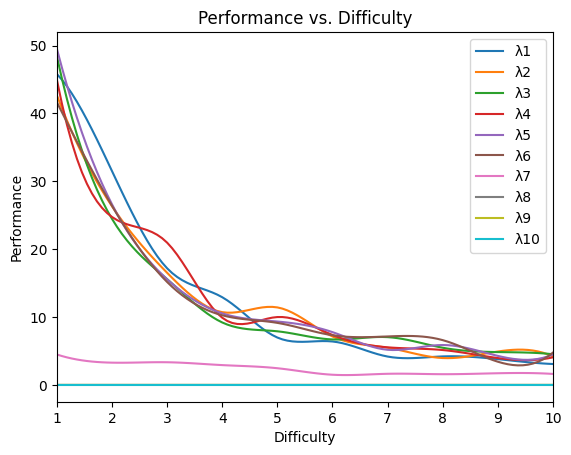

In [13]:
# Have to flip x and why for some reason???
for i in range(1, 11):
    line = np.column_stack((np.full_like(D, i), D))
    pred = interpn((discrete, discrete), data, line, "cubic")
    plt.plot(D, pred, label=f'\u03BB{i}')

plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

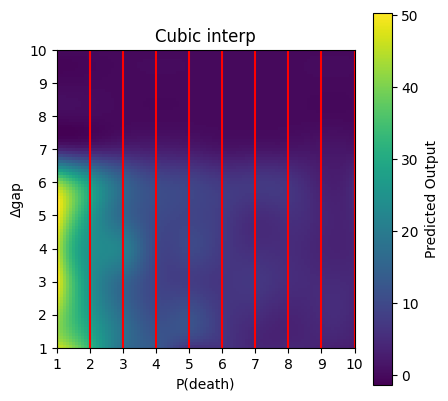

In [14]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 0
[plt.axvline(c, color='r') for c in range(1, 11)]

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()

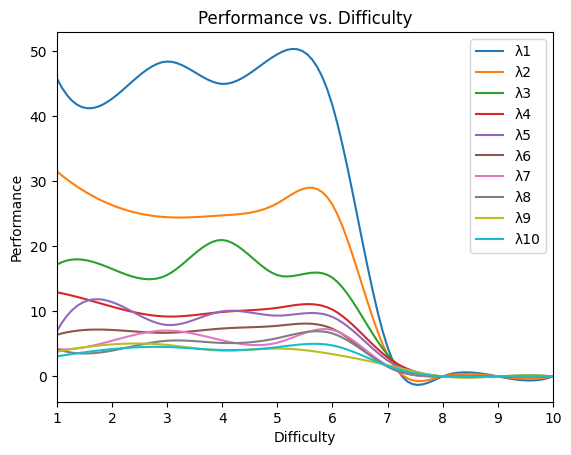

In [15]:
# Have to flip x and why for some reason???
for i in range(1, 11):
    line = np.column_stack((D, np.full_like(D, i)))
    pred = interpn((discrete, discrete), data, line, "cubic")
    plt.plot(D, pred, label=f'\u03BB{i}')

plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

# Difficulty curves across players

In [16]:
datas = [np.load(f"{p}_means.npy") for p in all_players]
surfaces = [interpolate(d, res=100) for d in datas]

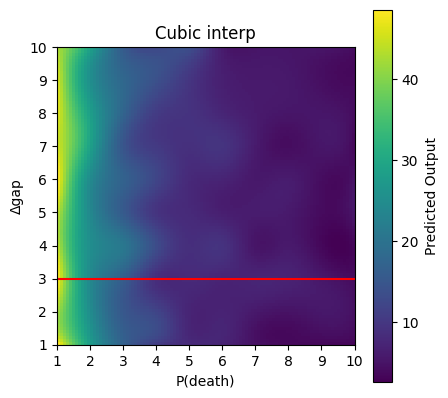

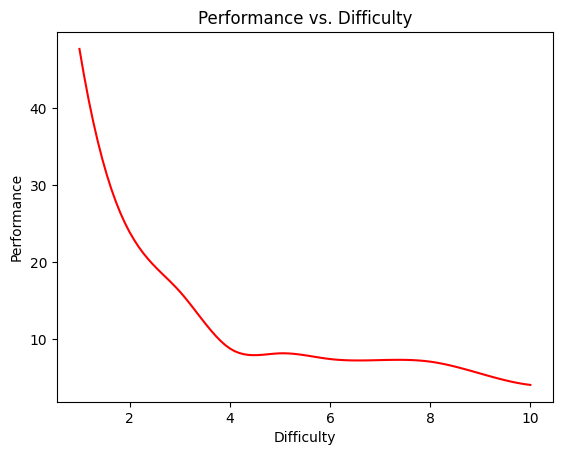

In [17]:
constant = 3
index = -1
Z = surfaces[index]

plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

plt.axhline(constant, color='r')

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()

d = datas[index]
line = np.column_stack((np.full_like(D, constant), D))
pred = interpn((discrete, discrete), d, line, "cubic")
plt.plot(D, pred, color="r")  
plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.title('Performance vs. Difficulty')
plt.show()

Text(0.5, 1.0, 'Performance vs. Difficulty')

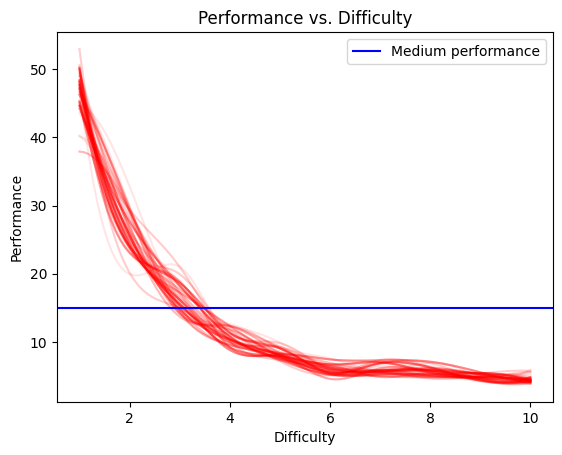

In [18]:
line = np.column_stack((np.full_like(D, constant), D))
preds = [interpn((discrete, discrete), d, line, "cubic") for d in datas]

for pred in preds[3:]:
    plt.plot(D, pred, color="r", alpha=0.1)

medium = 15
plt.axhline(medium, color='b', label='Medium performance')
plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.legend()
plt.title('Performance vs. Difficulty')


## Multiple intersections

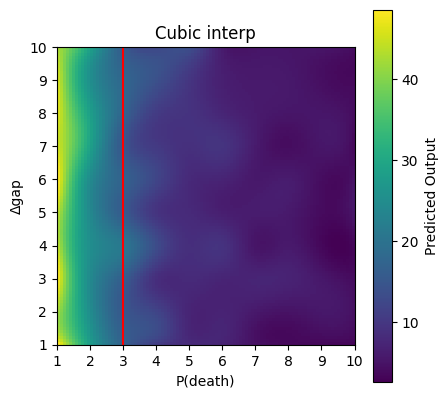

In [19]:
constant = 3
index = -1
Z = surfaces[index]

plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

plt.axvline(constant, color='r')

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()




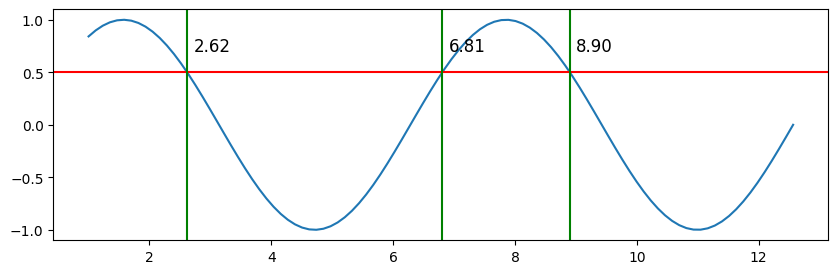

In [20]:
from scipy.optimize import minimize
from scipy.interpolate import interp1d

def get_x(X, Y, y_target) -> np.ndarray:
    f = interp1d(X, Y, kind='cubic')
    objective = lambda x: (f(x) - y_target)**2
    solutions = set()
    for x0 in range(1, 11):
        x = minimize(objective, x0, bounds=[(1, 10)]).x[0]
        if np.isclose(f(x), y_target):
            solutions.add(np.round(float(x), 2))

    return np.array(sorted(list(solutions)))

# Test the method
X = np.linspace(1, 4*np.pi, 100)
Y = np.sin(X)
target_y = 0.5
intersections = get_x(X, Y, target_y)
plt.figure(figsize=(10, 3))
plt.plot(X, Y)
# make fig smaller
plt.axhline(target_y, color='r')
for x in intersections:
    plt.axvline(x, color='g', label = f'x = {x}')
    plt.text(x + 0.1, 0.7, f"{x:0.2f}", fontsize=12, color='k')
plt.show()


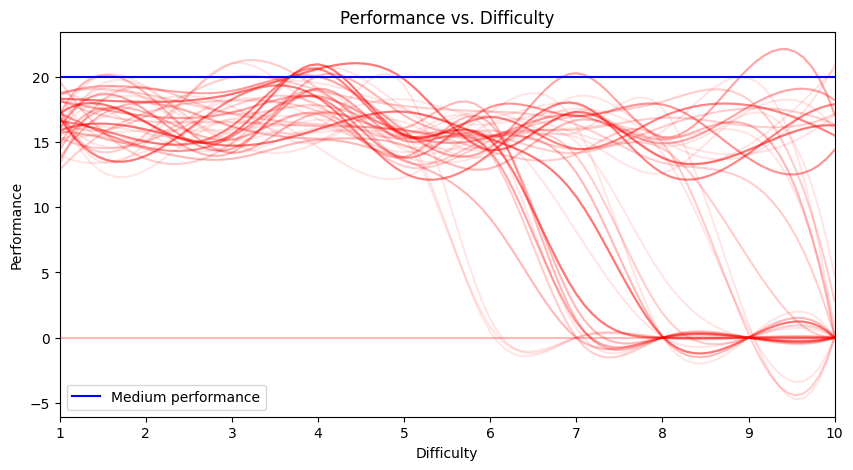

In [47]:
line = np.column_stack((D, np.full_like(D, constant)))
preds = [interpn((discrete, discrete), d, line, "cubic") for d in datas]

def plot_performace(medium, preds):
    plt.figure(figsize=(10, 5))
    for pred in preds:
        plt.plot(D, pred, color="r", alpha=0.1)
    plt.axhline(medium, color='b', label='Medium performance')

    plt.xlim(1, 10)
    plt.xlabel('Difficulty')
    plt.ylabel('Performance')
    plt.title('Performance vs. Difficulty')
    plt.legend()
    plt.show()

plot_performace(20, preds)

In [22]:
def get_intersection_spread(medium, Y) -> float:
    """Returns spread of x values intersecting with medium.
    or 0 if no intersection is found.
    """
    intersections = [get_x(D, y, medium) for y in Y]
    # filter out empty arrays and take mean
    means = [a.mean() for a in intersections if a.size > 0]
    return np.std(means) if means else 0

medium = 15
spread = get_intersection_spread(medium, preds)
spread


1.385103386049638

In [23]:
def get_spreads(mediums, preds):
    spreads = [(medium, get_intersection_spread(medium, preds)) for medium in mediums]
    return [(m, s) for m, s in spreads if s > 0]
# Determine spread for different performance levels
mediums = np.arange(10, 100, 10)
spreads = get_spreads(mediums, preds)
# get medium that resulsted in highest spread

spreads

[(10, 1.2518298850980072), (20, 1.5879617389518552)]

In [24]:
def plot_spreads(spreads, mediums):
    plt.figure(figsize=(4, 1))
    plt.bar(*zip(*spreads))
    plt.xticks(mediums)
    plt.xlabel('Medium performance')
    plt.ylabel('Spread')
    plt.title('Spread vs. Medium performance')
    plt.show()

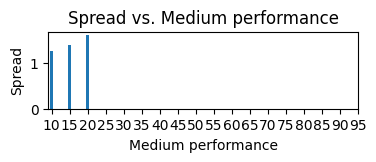

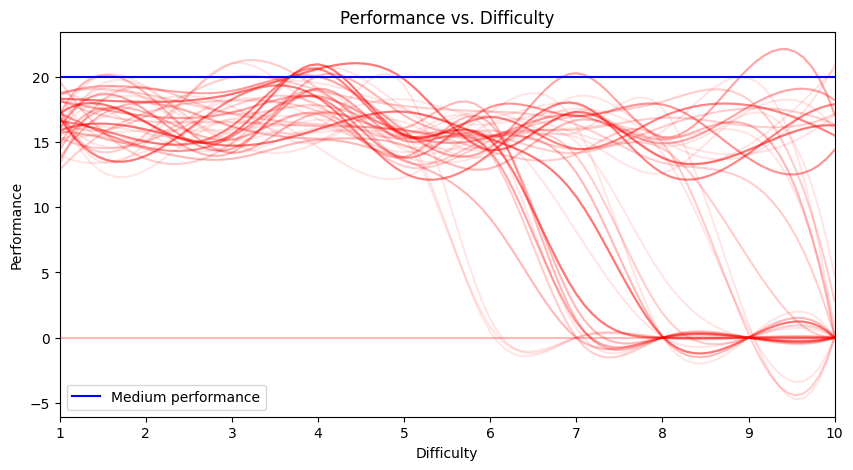

In [25]:
def spread_analysis(datas, line, mediums):
    preds = [interpn((discrete, discrete), d, line, "cubic") for d in datas]
    spreads = get_spreads(mediums, preds)
    plot_spreads(spreads, mediums)
    
    medium, _ = max(spreads, key=lambda x: x[1])
    plot_performace(medium, preds, D)
    

mediums = np.arange(10, 100, 5)
line = np.column_stack((D, np.full_like(D, constant)))
spread_analysis(datas, line, mediums)

# Varying difficulty curves

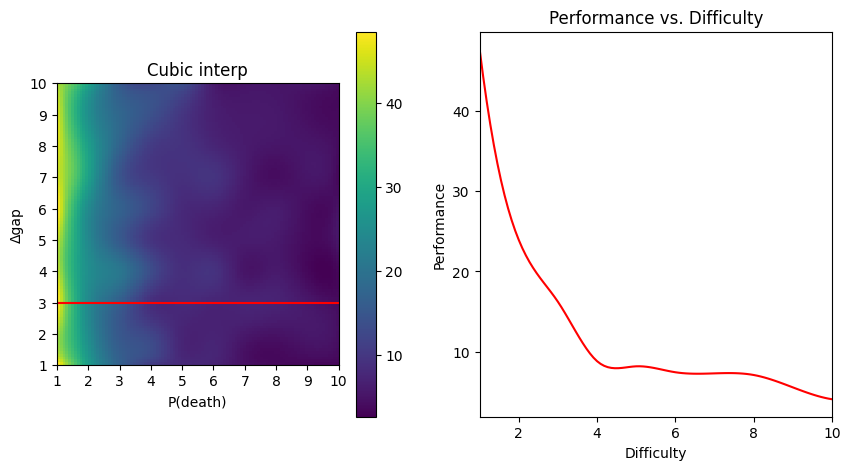

In [26]:
constant = 3
index = -1
data = datas[index]
Z = interpolate(data)

def plot_line(line):

    # Difficuly interpolation
    plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
    plt.colorbar(label='Predicted Output')

    # Draw line
    plt.plot(line[:, 1], line[:, 0], color='r')  # Flip x and y for some reason
    
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.xticks(range(1, 11))
    plt.yticks(range(1, 11))
    plt.xlabel("P(death)")
    plt.ylabel("\u0394gap")
    plt.title('Cubic interp')
    plt.show()

    # Performance vs. Difficulty
    plt.figure(figsize=(6, 3))

    performance = interpn((discrete, discrete), data, line, "cubic")
    plt.plot(D, performance, color="r")  
    plt.xlim(1, 10)
    plt.xlabel('Difficulty')
    plt.ylabel('Performance')
    plt.title('Performance vs. Difficulty')
    plt.show()

def subplot_line(line):
    # Replicate plot_line, but gather the plots in a subplot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    ax = axs[0]
    ax.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
    ax.colorbar = plt.colorbar(ax.images[0], ax=ax, orientation='vertical')
    ax.plot(line[:, 1], line[:, 0], color='r')
    ax.set_xlabel("P(death)")
    ax.set_ylabel("\u0394gap")
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(range(1, 11))
    ax.set_yticks(range(1, 11))
    ax.set_title('Cubic interp')

    ax = axs[1]
    performance = interpn((discrete, discrete), data, line, "cubic")
    ax.plot(D, performance, color="r")
    ax.set_xlim(1, 10)
    ax.set_xlabel('Difficulty')
    ax.set_ylabel('Performance')
    ax.set_title('Performance vs. Difficulty')

    plt.show()



_line = np.column_stack((np.full_like(D, constant), D))
subplot_line(_line)

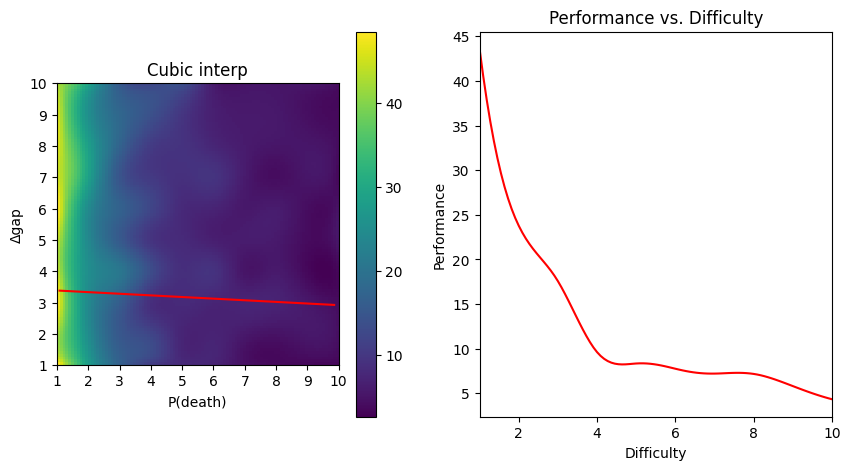

In [53]:
scale = 0.1
def wiggle(line):
    start_point = line[0] + np.random.normal(0, scale, 2)
    start_point = np.clip(start_point, 1, 10)

    end_point = line[-1] + np.random.normal(0, scale, 2)
    end_point = np.clip(end_point, 1, 10)

    X = np.linspace(start_point[1], end_point[1], 100)
    Y = np.linspace(start_point[0], end_point[0], 100)
    return np.column_stack((Y, X))

new_line = wiggle(new_line)
subplot_line(new_line)

# Optimizing spread by varying difficulty curves

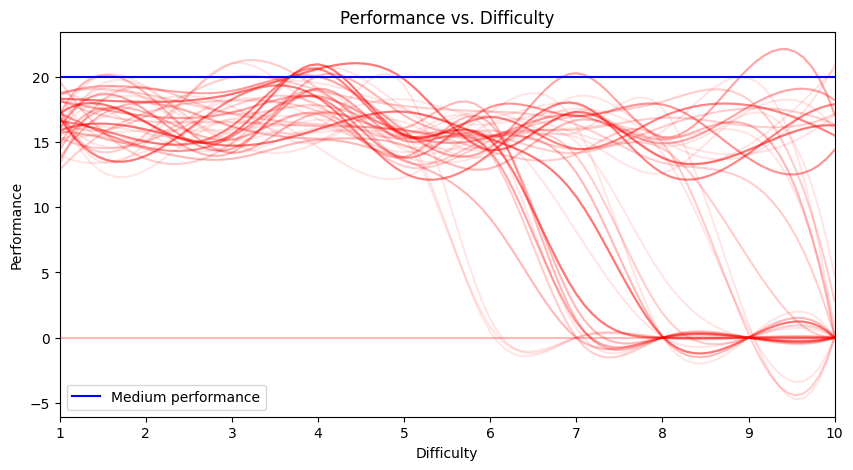

In [49]:
line = np.column_stack((D, np.full_like(D, constant)))
performances = [interpn((discrete, discrete), d, line, "cubic") for d in datas]

def plot_performace(medium, performances):
    plt.figure(figsize=(10, 5))
    for performance in performances:
        plt.plot(D, performance, color="r", alpha=0.1)
    plt.axhline(medium, color='b', label='Medium performance')

    plt.xlim(1, 10)
    plt.xlabel('Difficulty')
    plt.ylabel('Performance')
    plt.title('Performance vs. Difficulty')
    plt.legend()
    plt.show()

plot_performace(20, performances)

# Trainning session

In [ ]:
data0 = np.load("models/04_18/PPO_00_05_train_session.npy")
data1 = np.load("models/05_12/PPO_14_26_train_session.npy")
data2 = np.load("models/05_13/PPO_21_29_train_session.npy")

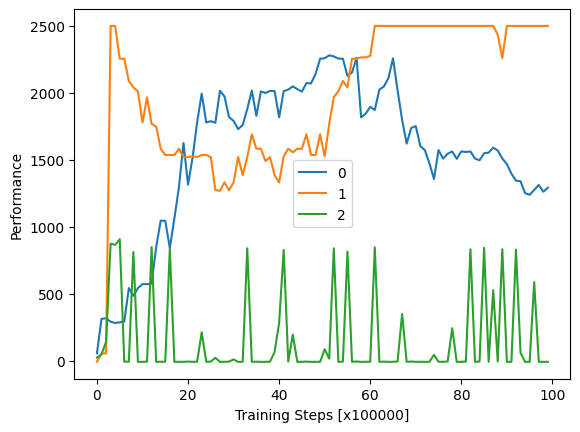

In [ ]:
def plt_mean(datas):
    for i, d in enumerate(datas):
        plt.plot(d.mean(axis=1), label=f'{i}')
    plt.xlabel('Training Steps [x100000]')
    plt.ylabel('Performance')
    plt.legend()
    plt.show()
plt_mean([data0, data1, data2])

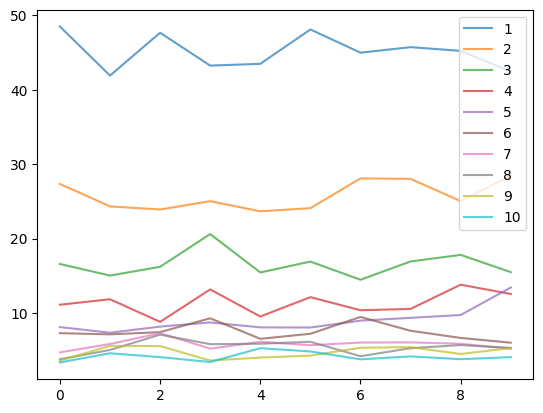

In [ ]:
for d in range(10):
    plt.plot(data[:, d], label=f'{d+1}', alpha=0.7)
plt.legend()
# save y limits
ylim = plt.ylim()